In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
#creating layer class

class Layer(object):
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        #TODO: return output
        pass

    def backward(self, output_gradient, learning_rate):
        # TODO: backpropagation step used for updating parameters and returning the gradient of the loss function
        pass

In [29]:
#creating dense layer class

class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

In [30]:
class Activation (Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime  = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)
    
    def backward(self, output_gradient, learning_rate):
        # multiply is a hadomar product which is element-wise multiplication with two vectors
        return np.multiply(output_gradient, self.activation_prime(self.input))


In [31]:
# activation used is a hyperbolic function

class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)

In [32]:
# loss function used is MSE 
        
def mse(y_true,y_pred):
    # power works like map function however second arguement exponent applied to vector
    return np.mean(np.power(y_pred - y_true, 2))

def mse_prime (y_true, y_pred):
    return 2 * (y_pred - y_true)/ np.size(y_true)
        

In [33]:
# Predict Function
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

In [34]:
#Training function
def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = True):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")

In [35]:
# our data is an XOR mapping looking at exclusive or statment 
X = np.reshape([[0,0],[0,1],[1,0],[1,1]],(4,2,1))
Y = np.reshape([[0],[1],[1],[0]],(4,1,1))


In [36]:
network = [
    Dense(2,3),
    Tanh(),
    Dense(3,1),
    Tanh()    
]

In [37]:
#zip maps each element of iterables into tuples grouped by position 
list(zip(X,Y))

[(array([[0],
         [0]]),
  array([[0]])),
 (array([[0],
         [1]]),
  array([[1]])),
 (array([[1],
         [0]]),
  array([[1]])),
 (array([[1],
         [1]]),
  array([[0]]))]

1/10000, error=0.41186746132136426
2/10000, error=0.3416702405176518
3/10000, error=0.262591715280468
4/10000, error=0.25333939109952197
5/10000, error=0.2530761432828855
6/10000, error=0.25174187593305664
7/10000, error=0.2513008596762129
8/10000, error=0.25077401160332097
9/10000, error=0.25046009533372987
10/10000, error=0.250164874745809
11/10000, error=0.24994443840153824
12/10000, error=0.2497478406333307
13/10000, error=0.2495853165639424
14/10000, error=0.24944047766760916
15/10000, error=0.2493140868843842
16/10000, error=0.2491998039723358
17/10000, error=0.2490966305230234
18/10000, error=0.24900164780050357
19/10000, error=0.2489137680758286
20/10000, error=0.24883142308355966
21/10000, error=0.2487537375078695
22/10000, error=0.24867975435117365
23/10000, error=0.2486088083040086
24/10000, error=0.24854025298783766
25/10000, error=0.2484735785682698
26/10000, error=0.24840831019358453
27/10000, error=0.24834404272279542
28/10000, error=0.24828040002436916
29/10000, error=0

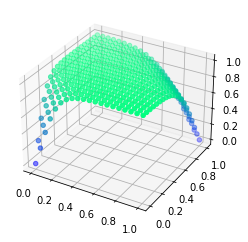

In [38]:
# train
train(network, mse, mse_prime, X, Y, epochs=10000, learning_rate=0.1)

# decision boundary plot
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = predict(network, [[x], [y]])
        points.append([x, y, z[0,0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()